In [1]:
!pip -q install selectivesearch
import selectivesearch
from skimage.segmentation import felzenszwalb
import torch
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Felzenszwalb Segmentation
In this section we use felzenszwalb segmentation and we expect that the result shows us different areas that have similar pixel values.

In [2]:
img = cv2.imread('drive/MyDrive/Soroush.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
segments_fz = felzenszwalb(img,
                           scale=200  # Number of clusters that can be formed
                                      # within the segments of the image
                           )

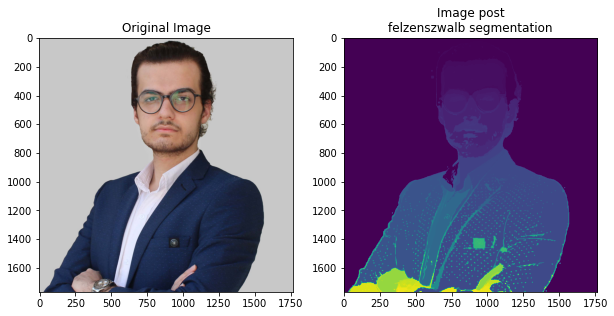

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

ax[0].imshow(img)
ax[0].set(title="Original Image")

ax[1].imshow(segments_fz)
ax[1].set(title="Image post\nfelzenszwalb segmentation");

# SelectiveSearch

In [5]:
def extract_candidates(img):
    _, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    
    img_area = np.prod(img.shape[:2])
    candidates = []

    for region in regions:
        if region['rect'] in candidates:
          continue
        if region['size'] < 0.05 * img_area or region['size'] > img_area:
          continue
        
        x, y, width, height = region['rect']
        bbox = mpatches.Rectangle((x, y), width, height,
                                  fill=False, edgecolor='green')
        candidates.append(bbox)
    return candidates

In [6]:
candidates = extract_candidates(img)

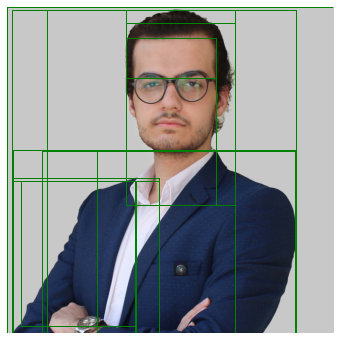

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
for bbox in candidates:
    ax.add_patch(bbox)

plt.axis('off');